### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler 

### Import Dataset

In [2]:
df = pd.read_csv("./Sample-DS.csv")
df.head()

,Date,Weekday,Hour,HOEP,Ontario_Demand,Temperature,Windchill_Index,Wind_Speed,Humidex,Relative_Humidity,Dew_Point,Pressure_Station
0,2016-01-01,Friday,0,0.49,14023,-0.3,-5.62,20,-3.18,70,-5.1,99.67
1,2016-01-01,Friday,1,-1.09,13417,-0.3,-6.30,25,-3.48,68,-5.5,99.63
2,2016-01-01,Friday,2,-2.41,12968,-0.4,-6.55,26,-3.43,73,-4.7,99.59
3,2016-01-01,Friday,12,0.00,14215,-2.1,-8.72,23,-4.86,76,-5.8,99.39
4,2016-01-01,Friday,13,0.00,14443,-2.4,-8.23,19,-5.09,84,-4.7,99.35


### Getting info about dataset

In [3]:
df.isnull().sum()

Date                 0
Weekday              0
Hour                 0
HOEP                 0
Ontario_Demand       0
Temperature          0
Windchill_Index      0
Wind_Speed           0
Humidex              0
Relative_Humidity    0
Dew_Point            0
Pressure_Station     0
dtype: int64

In [4]:
df.describe()

,Hour,HOEP,Ontario_Demand,Temperature,Windchill_Index,Wind_Speed,Humidex,Relative_Humidity,Dew_Point,Pressure_Station
count,39408.000000,39408.000000,39408.000000,39408.000000,39408.000000,39408.000000,39408.000000,39408.000000,39408.000000,39408.000000
mean,11.625076,13.923340,15397.914205,9.421272,6.565978,16.854243,9.859521,68.028598,3.330397,99.533605
std,6.945136,11.902378,2201.241563,10.899602,13.513148,9.220125,14.325742,16.773789,10.269080,0.776696
min,0.000000,-2.770000,9831.000000,-26.000000,-39.660000,0.000000,-31.100000,13.000000,-31.600000,96.490000
25%,6.000000,3.300000,13775.000000,0.800000,-3.950000,10.000000,-1.680000,57.000000,-4.400000,99.050000
50%,12.000000,12.950000,15272.000000,8.600000,5.670000,16.000000,7.860000,69.000000,3.000000,99.540000
75%,18.000000,22.510000,16881.000000,19.000000,18.580000,22.000000,22.350000,81.000000,12.100000,100.040000
max,23.000000,44.110000,24281.000000,35.100000,37.940000,80.000000,50.350000,100.000000,25.100000,102.410000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39408 entries, 0 to 39407
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               39408 non-null  object 
 1   Weekday            39408 non-null  object 
 2   Hour               39408 non-null  int64  
 3   HOEP               39408 non-null  float64
 4   Ontario_Demand     39408 non-null  int64  
 5   Temperature        39408 non-null  float64
 6   Windchill_Index    39408 non-null  float64
 7   Wind_Speed         39408 non-null  int64  
 8   Humidex            39408 non-null  float64
 9   Relative_Humidity  39408 non-null  int64  
 10  Dew_Point          39408 non-null  float64
 11  Pressure_Station   39408 non-null  float64
dtypes: float64(6), int64(4), object(2)
memory usage: 3.6+ MB


In [6]:
df["Weekday"].unique()

array(['Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday',
       'Thursday'], dtype=object)

### Work on date

In [7]:

date_hour = []
for idx, date in enumerate(df['Date']):
    time = df['Hour'][idx]
    combined = f"{date} {time}"
    date_hour.append(dt.datetime.strptime(combined, '%Y-%m-%d %H'))
    

df['Date_Hour'] = date_hour

df = df.drop(['Date', 'Hour'], axis=1)

df = df.set_index('Date_Hour')


In [8]:
df.head()

,Weekday,HOEP,Ontario_Demand,Temperature,Windchill_Index,Wind_Speed,Humidex,Relative_Humidity,Dew_Point,Pressure_Station
Date_Hour,,,,,,,,,,
2016-01-01 00:00:00,Friday,0.49,14023,-0.3,-5.62,20,-3.18,70,-5.1,99.67
2016-01-01 01:00:00,Friday,-1.09,13417,-0.3,-6.30,25,-3.48,68,-5.5,99.63
2016-01-01 02:00:00,Friday,-2.41,12968,-0.4,-6.55,26,-3.43,73,-4.7,99.59
2016-01-01 12:00:00,Friday,0.00,14215,-2.1,-8.72,23,-4.86,76,-5.8,99.39
2016-01-01 13:00:00,Friday,0.00,14443,-2.4,-8.23,19,-5.09,84,-4.7,99.35


# Lag Feature

In [9]:
df['Lag_1'] = df['HOEP'].shift(24)
df.dropna(inplace=True)
df

,Weekday,HOEP,Ontario_Demand,Temperature,Windchill_Index,Wind_Speed,Humidex,Relative_Humidity,Dew_Point,Pressure_Station,Lag_1
Date_Hour,,,,,,,,,,,
2016-01-02 12:00:00,Saturday,10.72,15852,-1.1,-7.43,22,-4.34,74,-5.2,99.28,0.49
2016-01-02 13:00:00,Saturday,11.25,16059,-0.8,-7.57,27,-4.02,73,-5.1,99.18,-1.09
2016-01-02 14:00:00,Saturday,0.00,15750,-0.5,-6.54,22,-3.73,71,-5.1,99.13,-2.41
2016-01-02 15:00:00,Saturday,0.00,15564,-0.5,-5.72,19,-3.68,69,-5.5,99.07,0.00
2016-01-02 16:00:00,Saturday,0.00,15571,-0.7,-5.97,19,-3.76,70,-5.5,99.05,0.00
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00,Thursday,36.85,17384,0.2,-4.02,13,-2.69,74,-3.8,100.66,10.72
2020-12-31 20:00:00,Thursday,19.69,16783,-0.2,-5.59,16,-3.58,65,-6.0,100.76,5.59
2020-12-31 21:00:00,Thursday,20.78,16154,-3.0,-7.44,12,-3.67,80,-6.0,100.81,5.82


### Plot and Review the columns

#### Ontario_Demand

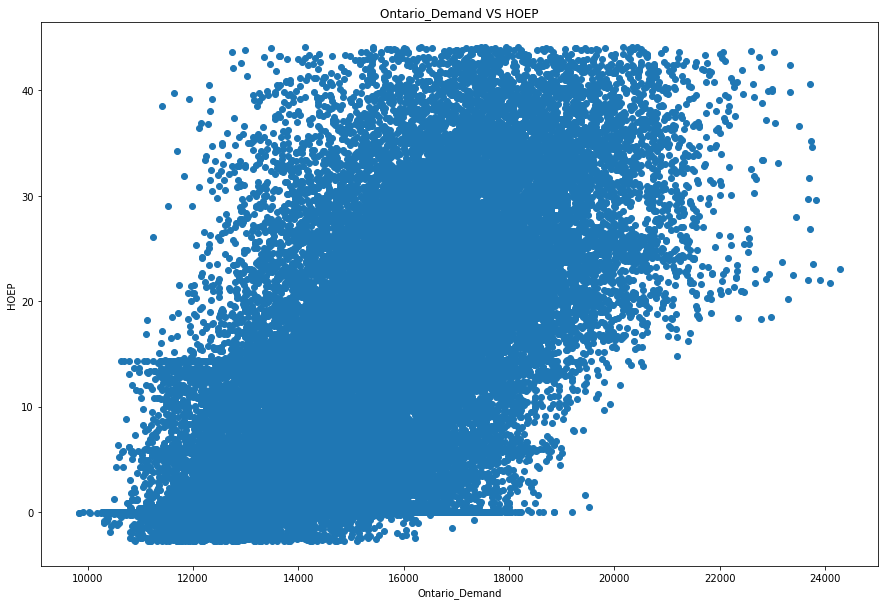

In [10]:
plt.figure(figsize=(15, 10))

plt.title("Ontario_Demand VS HOEP")
plt.xlabel("Ontario_Demand")
plt.ylabel("HOEP")
plt.scatter(df['Ontario_Demand'], df['HOEP'])

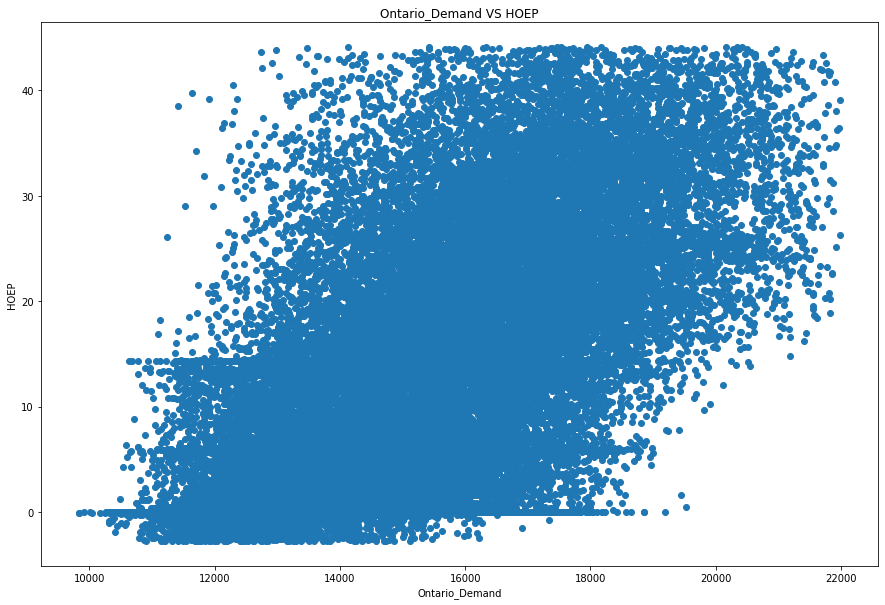

In [11]:
# Filter Ontario_Demand more than 22000
df = df[df['Ontario_Demand'] < 22000]


# Plot result
plt.figure(figsize=(15, 10))
plt.title("Ontario_Demand VS HOEP")
plt.xlabel("Ontario_Demand")
plt.ylabel("HOEP")
plt.scatter(df['Ontario_Demand'], df['HOEP'])



#### Temperature

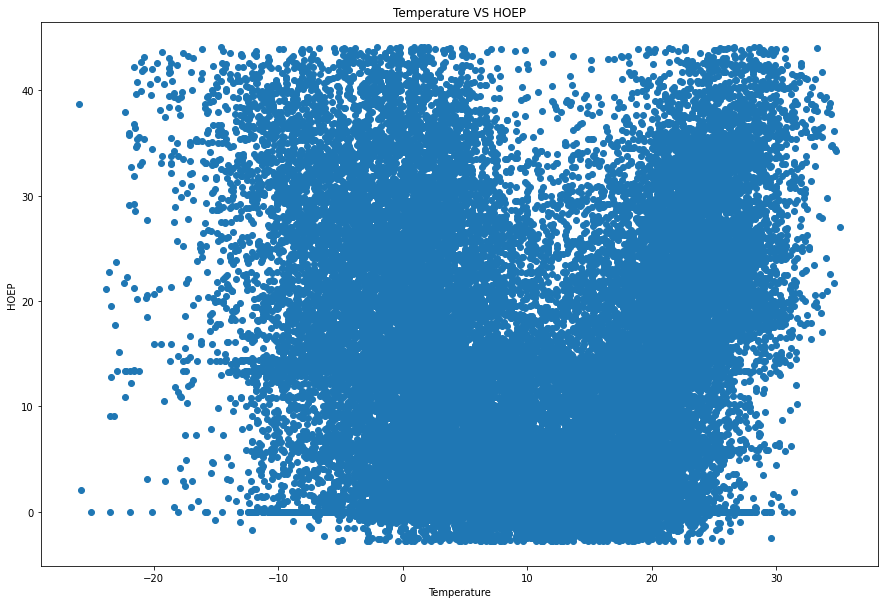

In [12]:
plt.figure(figsize=(15, 10))

plt.title("Temperature VS HOEP")
plt.xlabel("Temperature")
plt.ylabel("HOEP")
plt.scatter(df['Temperature'], df['HOEP'])

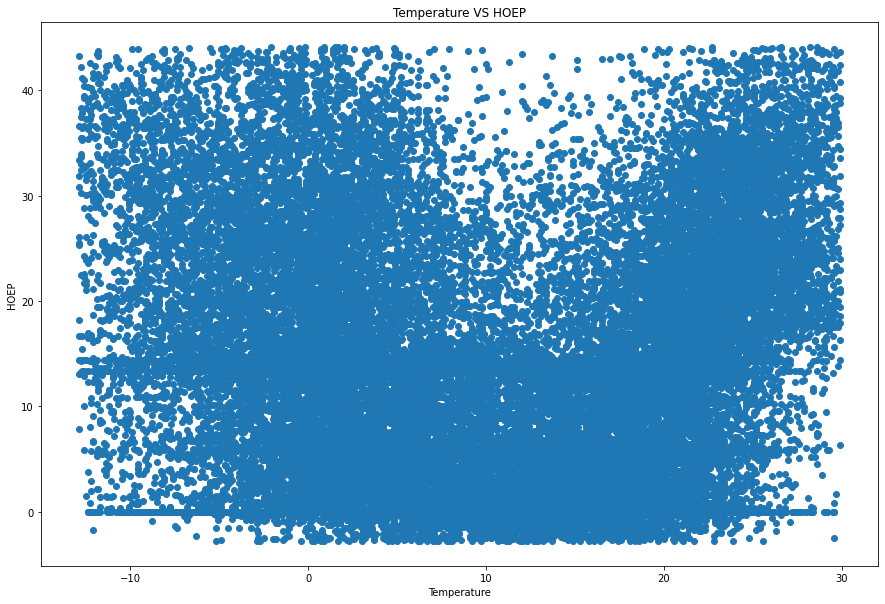

In [13]:
# Filter Temprature more than -13 and less than 30 degree
df = df[(df['Temperature'] > -13) & (df['Temperature'] < 30)]

# Plot result
plt.figure(figsize=(15, 10))
plt.title("Temperature VS HOEP")
plt.xlabel("Temperature")
plt.ylabel("HOEP")
plt.scatter(df['Temperature'], df['HOEP'])



#### Windchill_Index

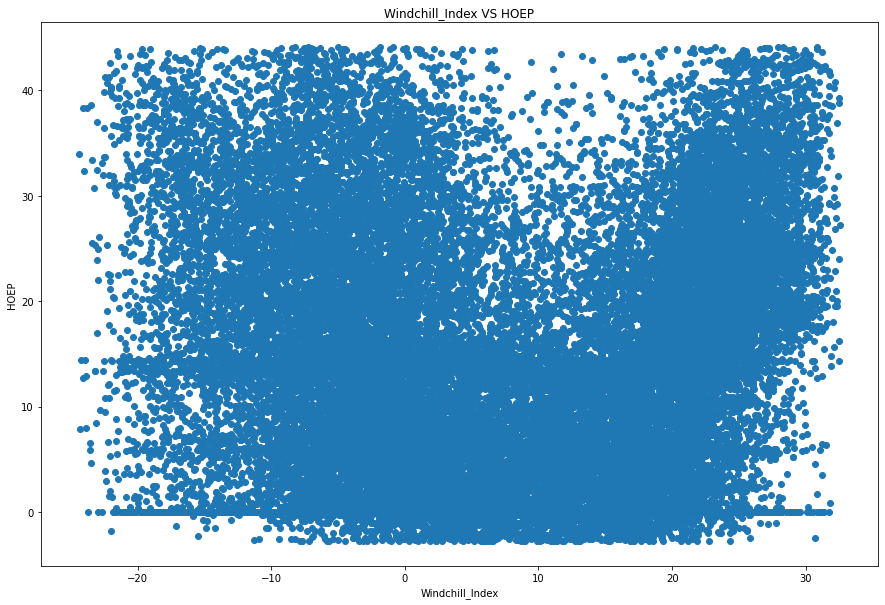

In [14]:
plt.figure(figsize=(15, 10))

plt.title("Windchill_Index VS HOEP")
plt.xlabel("Windchill_Index")
plt.ylabel("HOEP")
plt.scatter(df['Windchill_Index'], df['HOEP'])

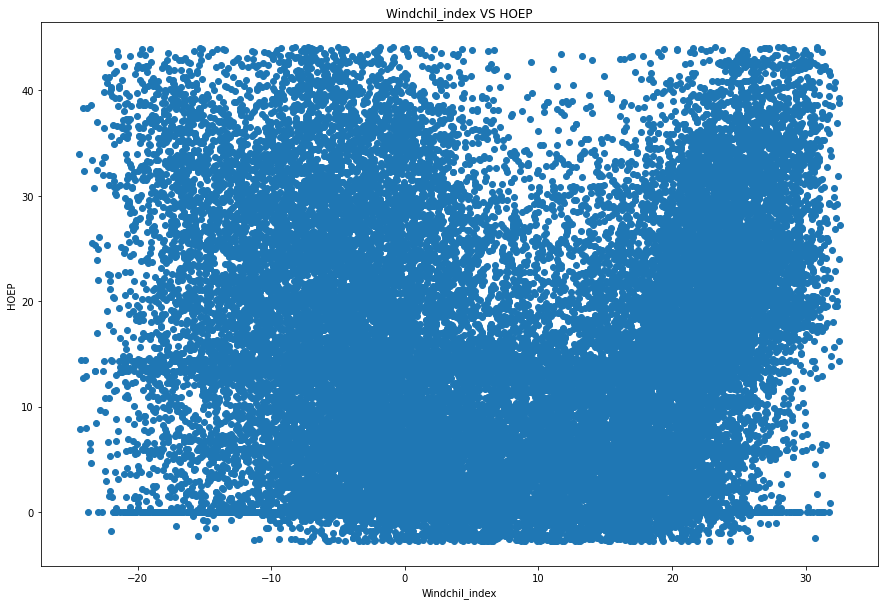

In [15]:
# Filter Temprature more than -30
df = df[df['Windchill_Index'] > -30]

# Plot result
plt.figure(figsize=(15, 10))
plt.title("Windchil_index VS HOEP")
plt.xlabel("Windchil_index")
plt.ylabel("HOEP")
plt.scatter(df['Windchill_Index'], df['HOEP'])

#### Wind_Speed

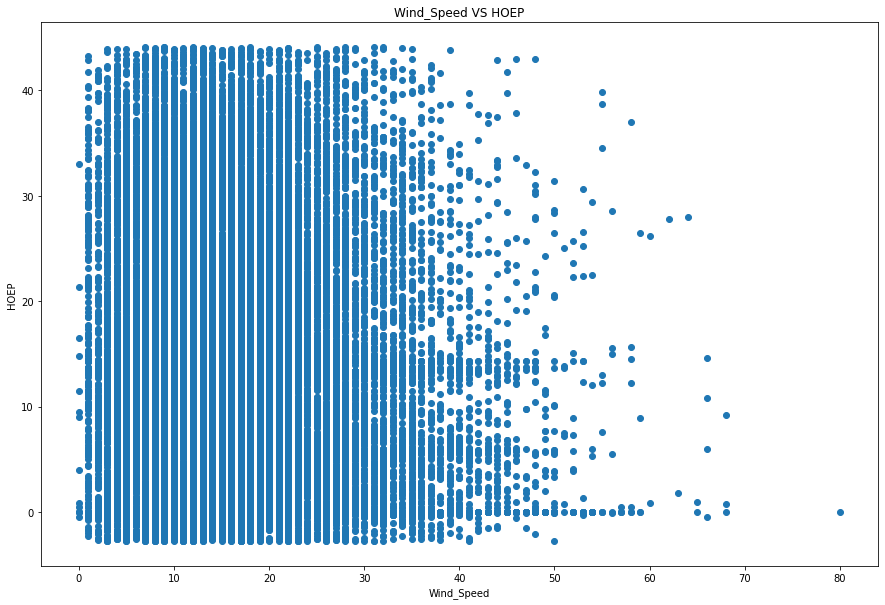

In [16]:
plt.figure(figsize=(15, 10))

plt.title("Wind_Speed VS HOEP")
plt.xlabel("Wind_Speed")
plt.ylabel("HOEP")
plt.scatter(df['Wind_Speed'], df['HOEP'])

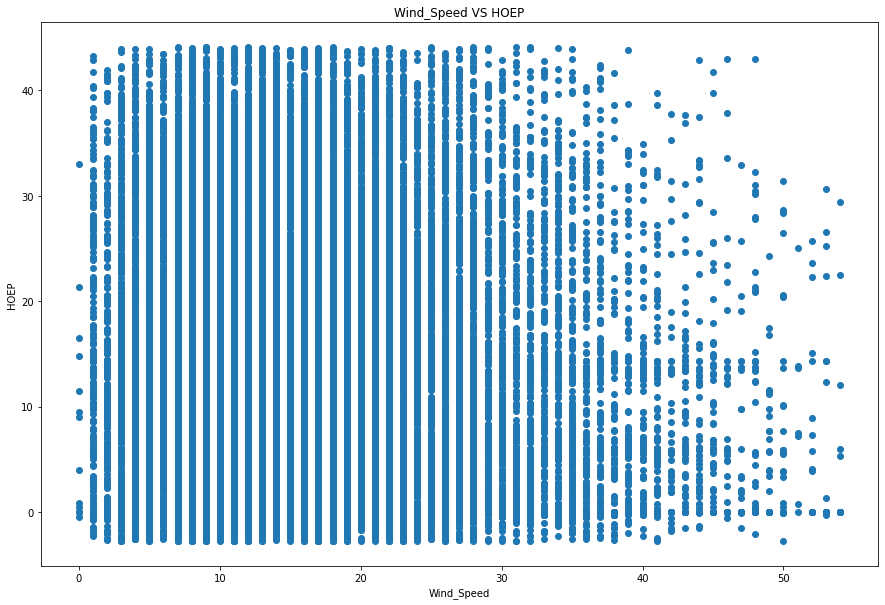

In [17]:
# Filter Wind_Speed less than 55
df = df[df['Wind_Speed'] < 55 ]

# Plot result
plt.figure(figsize=(15, 10))
plt.title("Wind_Speed VS HOEP")
plt.xlabel("Wind_Speed")
plt.ylabel("HOEP")
plt.scatter(df['Wind_Speed'], df['HOEP'])

#### Humidex

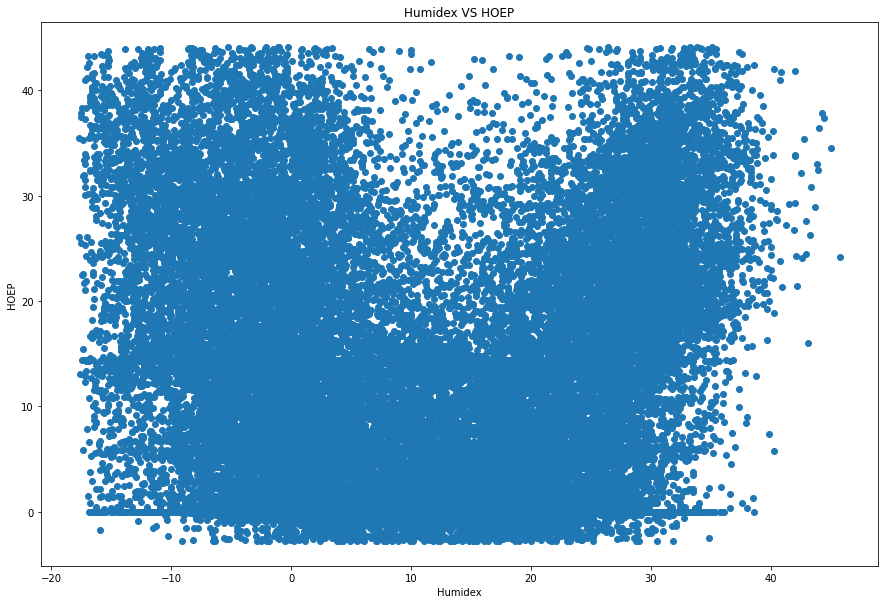

In [18]:
plt.figure(figsize=(15, 10))

plt.title("Humidex VS HOEP")
plt.xlabel("Humidex")
plt.ylabel("HOEP")
plt.scatter(df['Humidex'], df['HOEP'])

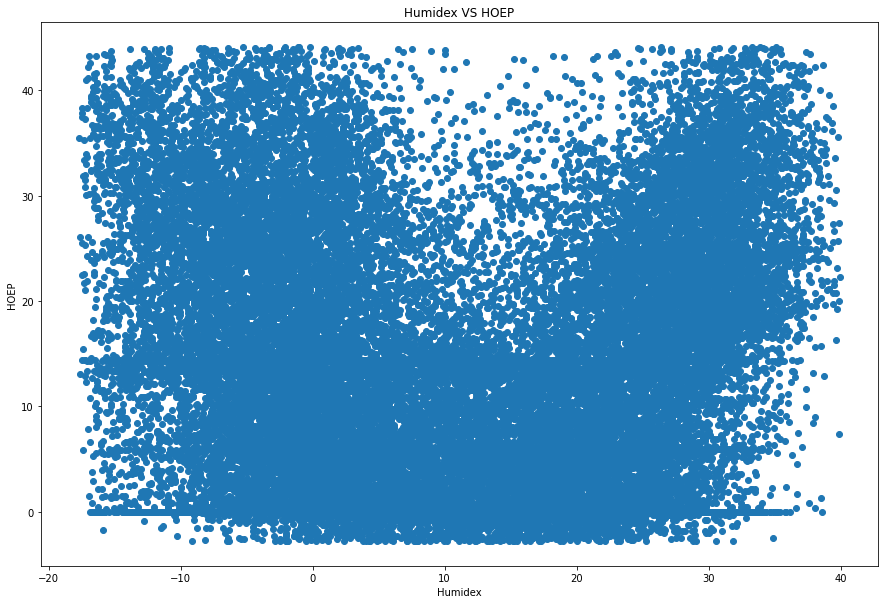

In [19]:
# Filter Humidex less than 40
df = df[df['Humidex'] < 40 ]

# Plot result
plt.figure(figsize=(15, 10))
plt.title("Humidex VS HOEP")
plt.xlabel("Humidex")
plt.ylabel("HOEP")
plt.scatter(df['Humidex'], df['HOEP'])

#### Relative_Humidity

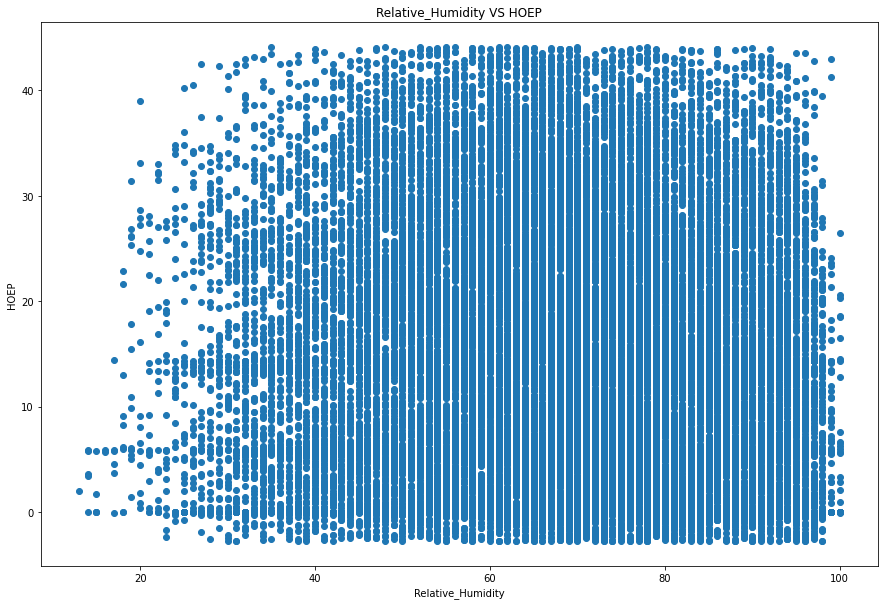

In [20]:
plt.figure(figsize=(15, 10))

plt.title("Relative_Humidity VS HOEP")
plt.xlabel("Relative_Humidity")
plt.ylabel("HOEP")
plt.scatter(df['Relative_Humidity'], df['HOEP'])

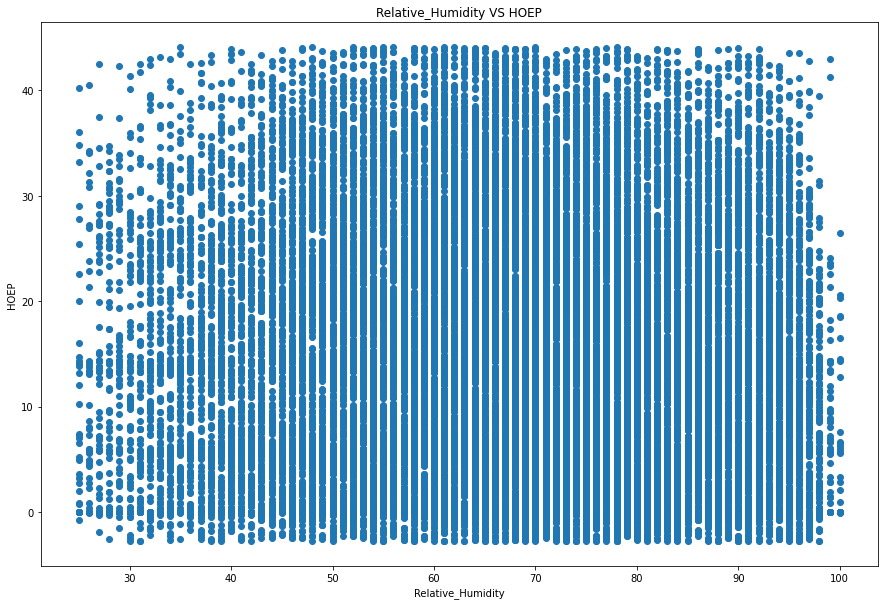

In [21]:
# Filter Relative_Humidity more than 24
df = df[df['Relative_Humidity'] > 24 ]

# Plot result
plt.figure(figsize=(15, 10))
plt.title("Relative_Humidity VS HOEP")
plt.xlabel("Relative_Humidity")
plt.ylabel("HOEP")
plt.scatter(df['Relative_Humidity'], df['HOEP'])

#### Dew_Point

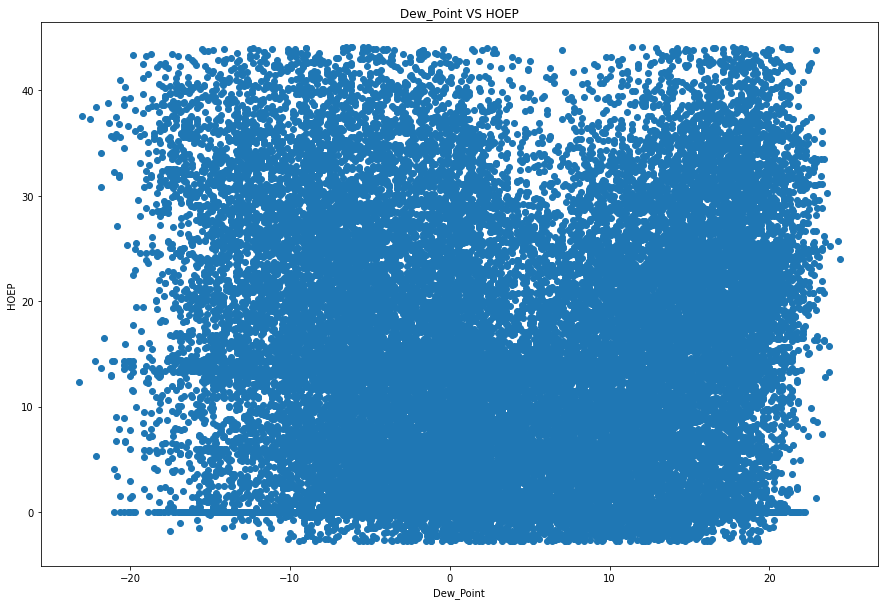

In [22]:
plt.figure(figsize=(15, 10))

plt.title("Dew_Point VS HOEP")
plt.xlabel("Dew_Point")
plt.ylabel("HOEP")
plt.scatter(df['Dew_Point'], df['HOEP'])

#### Pressure_Station

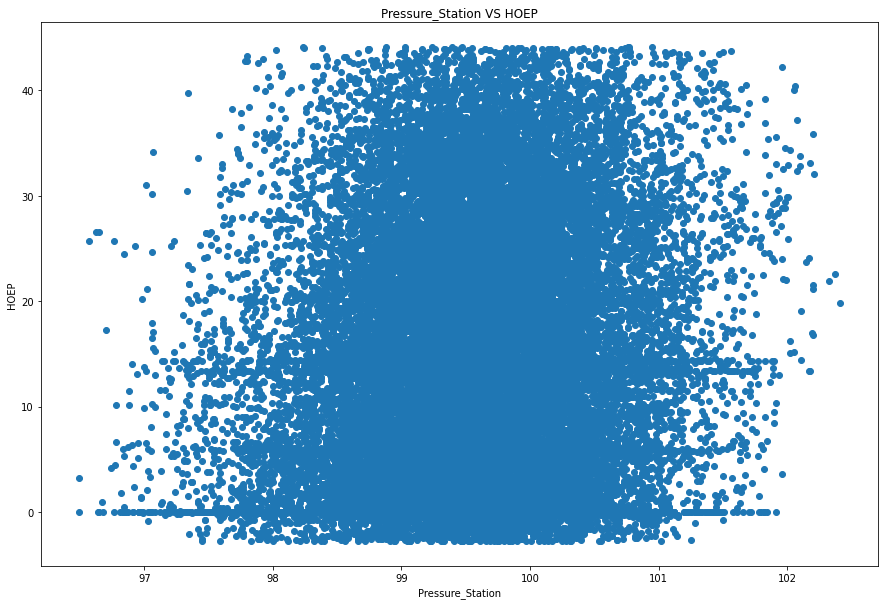

In [23]:
plt.figure(figsize=(15, 10))

plt.title("Pressure_Station VS HOEP")
plt.xlabel("Pressure_Station")
plt.ylabel("HOEP")
plt.scatter(df['Pressure_Station'], df['HOEP'])

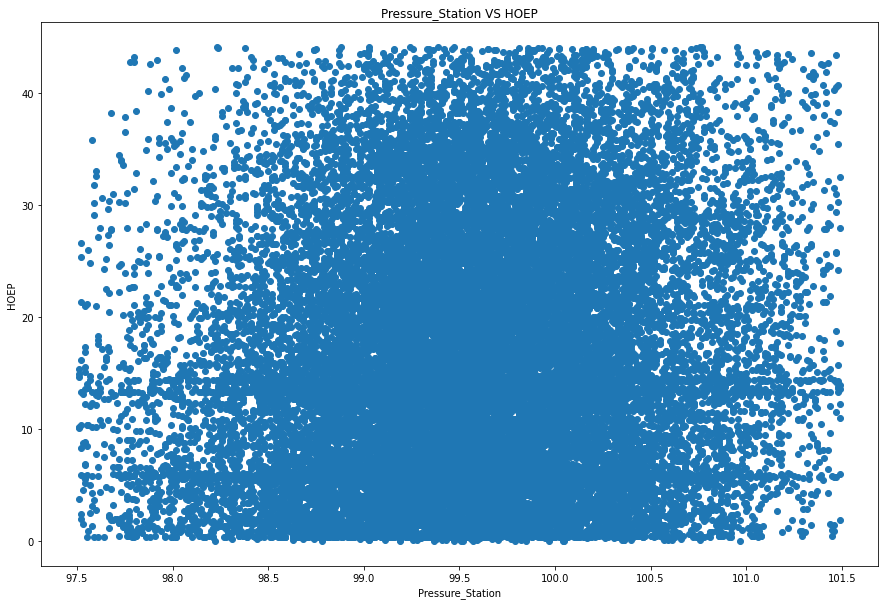

In [24]:
# Filter Pressure_Station more than -13 and less than 30 degree
df = df[(df['Pressure_Station'] > 97.5) & (df['Pressure_Station'] < 101.5)]
df = df[df["HOEP"] > 0]

# Plot result
plt.figure(figsize=(15, 10))
plt.title("Pressure_Station VS HOEP")
plt.xlabel("Pressure_Station")
plt.ylabel("HOEP")
plt.scatter(df['Pressure_Station'], df['HOEP'])

In [25]:
df.corr()

,HOEP,Ontario_Demand,Temperature,Windchill_Index,Wind_Speed,Humidex,Relative_Humidity,Dew_Point,Pressure_Station,Lag_1
HOEP,1.000000,0.540141,0.005921,0.013320,-0.082576,0.023335,-0.040359,-0.007342,0.104095,0.408180
Ontario_Demand,0.540141,1.000000,0.051988,0.037253,0.186386,0.070739,-0.131150,0.006665,-0.095546,0.402295
Temperature,0.005921,0.051988,1.000000,0.994205,-0.154799,0.992166,-0.204123,0.931608,-0.183570,0.026271
Windchill_Index,0.013320,0.037253,0.994205,1.000000,-0.231645,0.988391,-0.179220,0.934347,-0.167118,0.027292
Wind_Speed,-0.082576,0.186386,-0.154799,-0.231645,1.000000,-0.162698,-0.182601,-0.221435,-0.224009,0.004577
Humidex,0.023335,0.070739,0.992166,0.988391,-0.162698,1.000000,-0.123865,0.955642,-0.203174,0.043788
Relative_Humidity,-0.040359,-0.131150,-0.204123,-0.179220,-0.182601,-0.123865,1.000000,0.159961,-0.264891,0.006249
Dew_Point,-0.007342,0.006665,0.931608,0.934347,-0.221435,0.955642,0.159961,1.000000,-0.275328,0.031076
Pressure_Station,0.104095,-0.095546,-0.183570,-0.167118,-0.224009,-0.203174,-0.264891,-0.275328,1.000000,0.004077
Lag_1,0.408180,0.402295,0.026271,0.027292,0.004577,0.043788,0.006249,0.031076,0.004077,1.000000


In [26]:
df = df.drop(["Temperature" , "Dew_Point"], axis=1)

In [27]:
df.corr()

,HOEP,Ontario_Demand,Windchill_Index,Wind_Speed,Humidex,Relative_Humidity,Pressure_Station,Lag_1
HOEP,1.000000,0.540141,0.013320,-0.082576,0.023335,-0.040359,0.104095,0.408180
Ontario_Demand,0.540141,1.000000,0.037253,0.186386,0.070739,-0.131150,-0.095546,0.402295
Windchill_Index,0.013320,0.037253,1.000000,-0.231645,0.988391,-0.179220,-0.167118,0.027292
Wind_Speed,-0.082576,0.186386,-0.231645,1.000000,-0.162698,-0.182601,-0.224009,0.004577
Humidex,0.023335,0.070739,0.988391,-0.162698,1.000000,-0.123865,-0.203174,0.043788
Relative_Humidity,-0.040359,-0.131150,-0.179220,-0.182601,-0.123865,1.000000,-0.264891,0.006249
Pressure_Station,0.104095,-0.095546,-0.167118,-0.224009,-0.203174,-0.264891,1.000000,0.004077
Lag_1,0.408180,0.402295,0.027292,0.004577,0.043788,0.006249,0.004077,1.000000


In [28]:
group_by_weekday = df.groupby("Weekday").mean()
group_by_weekday

,HOEP,Ontario_Demand,Windchill_Index,Wind_Speed,Humidex,Relative_Humidity,Pressure_Station,Lag_1
Weekday,,,,,,,,
Friday,16.535660,15825.528365,6.880957,16.421802,10.156038,67.457175,99.577635,15.855026
Monday,17.356573,15874.222771,7.096654,15.777004,10.306782,68.582529,99.597799,12.082185
Saturday,15.100030,14950.488426,6.407227,15.923843,9.662611,68.155093,99.644178,16.091389
Sunday,14.560379,14832.288030,6.749065,15.928180,9.928354,68.052868,99.638671,14.006835
Thursday,17.284135,16049.743746,7.035404,16.073091,10.346941,68.593648,99.519102,16.117988
Tuesday,17.468094,16072.109173,7.185640,15.815245,10.450887,68.702842,99.533127,15.891785
Wednesday,17.433458,16057.690945,6.890514,16.463255,10.230494,67.435914,99.517773,16.420737


### X and y

In [29]:
y = df.loc[:, ['HOEP']]
df = df.drop(['HOEP'], axis=1)

y


,HOEP
Date_Hour,
2016-01-02 12:00:00,10.72
2016-01-02 13:00:00,11.25
2016-01-02 17:00:00,2.96
2016-01-02 18:00:00,5.85
2016-01-02 19:00:00,5.60
...,...
2020-12-31 19:00:00,36.85
2020-12-31 20:00:00,19.69
2020-12-31 21:00:00,20.78


In [30]:
onehot = df.iloc[:, :]
onehot

,Weekday,Ontario_Demand,Windchill_Index,Wind_Speed,Humidex,Relative_Humidity,Pressure_Station,Lag_1
Date_Hour,,,,,,,,
2016-01-02 12:00:00,Saturday,15852,-7.43,22,-4.34,74,99.28,0.49
2016-01-02 13:00:00,Saturday,16059,-7.57,27,-4.02,73,99.18,-1.09
2016-01-02 17:00:00,Saturday,16207,-6.38,20,-4.03,69,99.03,0.00
2016-01-02 18:00:00,Saturday,17163,-6.81,23,-3.95,68,99.04,0.00
2016-01-02 19:00:00,Saturday,17100,-6.80,26,-3.65,70,98.97,0.00
...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00,Thursday,17384,-4.02,13,-2.69,74,100.66,10.72
2020-12-31 20:00:00,Thursday,16783,-5.59,16,-3.58,65,100.76,5.59
2020-12-31 21:00:00,Thursday,16154,-7.44,12,-3.67,80,100.81,5.82


In [31]:
onehot = pd.get_dummies(df,
                    columns=['Weekday'],
                    prefix='weekday',
                    drop_first=True)

onehot

,Ontario_Demand,Windchill_Index,Wind_Speed,Humidex,Relative_Humidity,Pressure_Station,Lag_1,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
Date_Hour,,,,,,,,,,,,,
2016-01-02 12:00:00,15852,-7.43,22,-4.34,74,99.28,0.49,0,1,0,0,0,0
2016-01-02 13:00:00,16059,-7.57,27,-4.02,73,99.18,-1.09,0,1,0,0,0,0
2016-01-02 17:00:00,16207,-6.38,20,-4.03,69,99.03,0.00,0,1,0,0,0,0
2016-01-02 18:00:00,17163,-6.81,23,-3.95,68,99.04,0.00,0,1,0,0,0,0
2016-01-02 19:00:00,17100,-6.80,26,-3.65,70,98.97,0.00,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00,17384,-4.02,13,-2.69,74,100.66,10.72,0,0,0,1,0,0
2020-12-31 20:00:00,16783,-5.59,16,-3.58,65,100.76,5.59,0,0,0,1,0,0
2020-12-31 21:00:00,16154,-7.44,12,-3.67,80,100.81,5.82,0,0,0,1,0,0


In [32]:
onehot_columns =  onehot.columns
norm = StandardScaler()
df_scaled = norm.fit_transform(onehot.to_numpy())
df_scaled = pd.DataFrame(onehot, 
                        index=df.index,
                        columns=onehot_columns)
                                    
df_scaled

,Ontario_Demand,Windchill_Index,Wind_Speed,Humidex,Relative_Humidity,Pressure_Station,Lag_1,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
Date_Hour,,,,,,,,,,,,,
2016-01-02 12:00:00,15852,-7.43,22,-4.34,74,99.28,0.49,0,1,0,0,0,0
2016-01-02 13:00:00,16059,-7.57,27,-4.02,73,99.18,-1.09,0,1,0,0,0,0
2016-01-02 17:00:00,16207,-6.38,20,-4.03,69,99.03,0.00,0,1,0,0,0,0
2016-01-02 18:00:00,17163,-6.81,23,-3.95,68,99.04,0.00,0,1,0,0,0,0
2016-01-02 19:00:00,17100,-6.80,26,-3.65,70,98.97,0.00,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00,17384,-4.02,13,-2.69,74,100.66,10.72,0,0,0,1,0,0
2020-12-31 20:00:00,16783,-5.59,16,-3.58,65,100.76,5.59,0,0,0,1,0,0
2020-12-31 21:00:00,16154,-7.44,12,-3.67,80,100.81,5.82,0,0,0,1,0,0


In [33]:
df_scaled['time'] = np.arange(len(df_scaled.index))
df_scaled

,Ontario_Demand,Windchill_Index,Wind_Speed,Humidex,Relative_Humidity,Pressure_Station,Lag_1,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,time
Date_Hour,,,,,,,,,,,,,,
2016-01-02 12:00:00,15852,-7.43,22,-4.34,74,99.28,0.49,0,1,0,0,0,0,0
2016-01-02 13:00:00,16059,-7.57,27,-4.02,73,99.18,-1.09,0,1,0,0,0,0,1
2016-01-02 17:00:00,16207,-6.38,20,-4.03,69,99.03,0.00,0,1,0,0,0,0,2
2016-01-02 18:00:00,17163,-6.81,23,-3.95,68,99.04,0.00,0,1,0,0,0,0,3
2016-01-02 19:00:00,17100,-6.80,26,-3.65,70,98.97,0.00,0,1,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00,17384,-4.02,13,-2.69,74,100.66,10.72,0,0,0,1,0,0,31086
2020-12-31 20:00:00,16783,-5.59,16,-3.58,65,100.76,5.59,0,0,0,1,0,0,31087
2020-12-31 21:00:00,16154,-7.44,12,-3.67,80,100.81,5.82,0,0,0,1,0,0,31088


## Models

In [34]:
from sklearn.model_selection import train_test_split

# Models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error 

In [35]:
X = df_scaled[['Ontario_Demand' , 'Windchill_Index', 'Wind_Speed', 'Humidex', 'Relative_Humidity', 'Pressure_Station', 'weekday_Monday', 'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday', 'time']]

X_train, X_test, y_train, y_test = train_test_split(df_scaled, y, test_size=0.2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(24872, 14)
(6219, 14)
(24872, 1)
(6219, 1)


In [36]:
models = {'LR': LinearRegression(),
            'DT': DecisionTreeRegressor(),
            'SVR': SVR(),
            'RF': RandomForestRegressor()}


In [37]:
# model = LinearRegression()
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)
# mse = mean_squared_error(y_test, y_pred)
# mae = mean_absolute_error(y_test, y_pred)

# print('Linear Regression -->')
# print("MSE: ", mse)
# print("MAE: ", mae)


In [38]:
# model = DecisionTreeRegressor()
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)
# mse = mean_squared_error(y_test, y_pred)
# mae = mean_absolute_error(y_test, y_pred)

# print('\nDecisionTreeRegressor -->')
# print("MSE: ", mse)
# print("MAE: ", mae)

In [39]:
# model = SVR()
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)
# mse = mean_squared_error(y_test, y_pred)
# mae = mean_absolute_error(y_test, y_pred)

# print('\nSVR -->')
# print("MSE: ", mse)
# print("MAE: ", mae)

In [40]:
# model = RandomForestRegressor()
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)
# mse = mean_squared_error(y_test, y_pred)
# mae = mean_absolute_error(y_test, y_pred)

# print('\nRandomForestRegressor -->')
# print("MSE: ", mse)
# print("MAE: ", mae)

In [41]:
results = {}

for idx, ml in enumerate(models):
    model = models[ml]
    # model_name = type(model).__name__
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[idx] = {}
    results[idx]['MSE'] = mean_squared_error(y_test, y_pred)
    results[idx]['MAE'] = mean_absolute_error(y_test, y_pred)

    print(results)

{0: {'MSE': 73.57707484884924, 'MAE': 6.824226457074643}}
{0: {'MSE': 73.57707484884924, 'MAE': 6.824226457074643}, 1: {'MSE': 104.19319210484001, 'MAE': 7.28268371120759}}


C:\Users\Stoo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{0: {'MSE': 73.57707484884924, 'MAE': 6.824226457074643}, 1: {'MSE': 104.19319210484001, 'MAE': 7.28268371120759}, 2: {'MSE': 78.83875500928646, 'MAE': 7.076834523121536}}


C:\Users\Stoo\AppData\Local\Temp/ipykernel_9776/4060108575.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


{0: {'MSE': 73.57707484884924, 'MAE': 6.824226457074643}, 1: {'MSE': 104.19319210484001, 'MAE': 7.28268371120759}, 2: {'MSE': 78.83875500928646, 'MAE': 7.076834523121536}, 3: {'MSE': 52.65293348623412, 'MAE': 5.455614294902717}}
